# # Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://github.com/alexeygrigorev/datasets/blob/8aa02f8bd20f565eed700cc3da31d8de292556c2/course_lead_scoring.csv).


In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold

# # Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For categorical features, replace them with 'NA'
    * For numerical features, replace with with 0.0 

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [2]:
# https://github.com/alexeygrigorev/datasets/blob/8aa02f8bd20f565eed700cc3da31d8de292556c2/course_lead_scoring.csv
dataset = 'data/course_lead_scoring.csv'
data = pd.read_csv(dataset)
data.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [3]:
nulls = data.isnull().sum()
nulls

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [4]:
data.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [5]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

df = data.copy()
df.loc[:, categorical] = df[categorical].fillna('NA', inplace=False)
df.loc[:, numerical] = df[numerical].fillna(0, inplace=False)

df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [6]:
seed = 1

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)

print(len(df_train), len(df_val), len(df_test))

876 293 293


In [7]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [8]:
y_train = df_train.converted.to_numpy()
y_val = df_val.converted.to_numpy()
y_test = df_test.converted.to_numpy()

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [9]:
df_train.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,events,manufacturing,2,95543.0,unemployed,europe,3,0.78
1,referral,NA,1,54924.0,student,south_america,6,0.39
2,organic_search,healthcare,2,77352.0,unemployed,europe,2,0.22
3,paid_ads,other,2,34600.0,employed,south_america,2,0.31
4,paid_ads,education,0,43615.0,unemployed,south_america,2,0.01


In [10]:
y_train[:20]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1])

# # Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['balance']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `lead_score`
- `number_of_courses_viewed`
- `interaction_count`
- `annual_income`

# # Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.32
- 0.52
- 0.72
- 0.92

In [11]:
scaler = StandardScaler()
df_train.loc[:, numerical] = scaler.fit_transform(df_train[numerical])

/tmp/ipykernel_27434/3307476291.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.03051002 -0.71581191 -0.03051002 -0.03051002 -1.40111381 -0.71581191
 -0.71581191 -1.40111381 -1.40111381 -1.40111381 -0.71581191 -0.03051002
 -0.71581191  2.02539568 -0.03051002 -0.03051002 -0.71581191 -1.40111381
  0.65479188  1.34009378 -0.03051002 -0.03051002 -0.71581191 -0.71581191
 -1.40111381 -0.71581191 -0.71581191 -0.03051002  2.02539568 -0.71581191
 -0.71581191 -0.03051002 -0.03051002  0.65479188 -0.71581191 -0.03051002
 -1.40111381  2.02539568 -0.03051002 -0.71581191 -0.03051002  0.65479188
 -0.71581191  2.71069757 -0.71581191  0.65479188  1.34009378  0.65479188
  1.34009378 -0.03051002 -0.03051002  0.65479188 -0.71581191 -0.71581191
  1.34009378  0.65479188 -0.71581191 -0.03051002 -0.71581191 -0.71581191
 -0.71581191 -0.71581191  0.65479188 -0.71581191 -0.71581191 -0.71581191
 -1.40111381  0.65479188 -1.40111381  1.3

In [12]:
df_val.loc[:, numerical] = scaler.transform(df_val[numerical])
# df_test.loc[:, numerical] = scaler.transform(df_test[numerical])

/tmp/ipykernel_27434/2606883044.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.71581191 -0.03051002  0.65479188  0.65479188 -0.71581191 -0.71581191
  2.02539568 -1.40111381 -0.03051002  2.02539568  0.65479188 -0.03051002
  2.71069757 -0.71581191  2.02539568  2.02539568 -0.03051002 -1.40111381
 -0.71581191 -0.03051002 -0.03051002 -1.40111381  1.34009378 -0.71581191
  0.65479188 -1.40111381 -0.71581191 -0.03051002 -0.71581191  1.34009378
 -0.03051002 -0.03051002 -0.03051002 -0.03051002 -0.03051002 -0.03051002
  1.34009378  0.65479188 -0.03051002 -1.40111381  0.65479188 -1.40111381
 -1.40111381 -0.03051002 -0.71581191 -0.03051002 -0.71581191 -0.71581191
 -0.71581191  2.71069757 -0.71581191 -0.71581191  3.39599947 -0.03051002
  1.34009378 -0.03051002 -0.71581191 -0.71581191 -0.71581191  1.34009378
 -1.40111381 -0.71581191 -1.40111381  0.65479188 -0.71581191 -0.71581191
 -0.71581191 -1.40111381 -0.71581191 -1.4

In [13]:
df_train.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,events,manufacturing,-0.030510,1.759750,unemployed,europe,0.028413,0.996768
1,referral,NA,-0.715812,0.076786,student,south_america,1.849586,-0.377136
2,organic_search,healthcare,-0.030510,1.006043,unemployed,europe,-0.578645,-0.976017
3,paid_ads,other,-0.030510,-0.765297,employed,south_america,-0.578645,-0.658962
4,paid_ads,education,-1.401114,-0.391779,unemployed,south_america,-0.578645,-1.715811


In [14]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

# full_train_dict = df_full_train.to_dict(orient='records')
# X_full_train = dv.transform(full_train_dict)

In [15]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [16]:
y_pred = model.predict_proba(X_val)[:, 1]
np.round(roc_auc_score(y_val, y_pred), 3)

np.float64(0.921)

# # Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.145
* 0.345
* 0.545
* 0.745

In [17]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [18]:
thresholds = np.linspace(0, 1, 101)
values = np.zeros((len(thresholds), 2))

for i, t in enumerate(thresholds):
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    values[i, :] = [precision, recall]

precision = values[:, 0]
recall = values[:, 1]

/tmp/ipykernel_27434/296182054.py:14: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


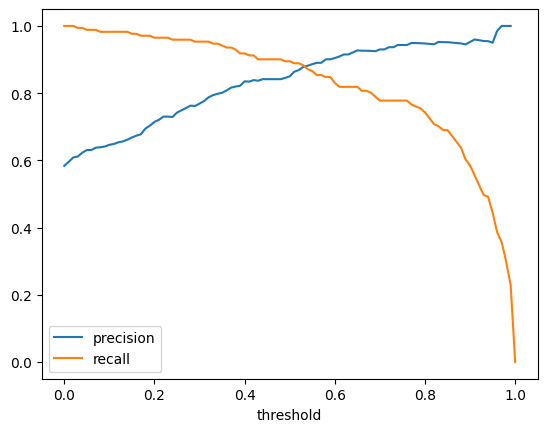

In [19]:
plt.plot(thresholds, precision, label='precision')
plt.plot(thresholds, recall, label='recall')
plt.xlabel('threshold')
plt.legend();

Se intersectan en t = 0.545

# # Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.14
- 0.34
- 0.54
- 0.74

In [20]:
F1_score = 2 * precision * recall / (precision + recall)
idx_max = np.nanargmax(F1_score)

print(f'max(F1 score) = {F1_score[idx_max]:.2f} is the result of threshold = {thresholds[idx_max]}')

max(F1 score) = 0.88 is the result of threshold = 0.53


# # Question 5: 5-Fold CV

Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.36

In [21]:
def train(df_train, y_train, C=1.0, categorical=categorical, numerical=numerical):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model, categorical=categorical, numerical=numerical):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred


In [22]:
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scaler2 = StandardScaler()
df_full_train.loc[:, numerical] = scaler2.fit_transform(df_full_train[numerical])
df_test.loc[:, numerical] = scaler2.transform(df_test[numerical])

C1_scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.converted.to_numpy()
    y_val = df_val.converted.to_numpy()

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    C1_scores.append(auc)

np.round(np.std(C1_scores), 4)


/tmp/ipykernel_27434/2057791801.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.71467902 -0.02987593 -0.71467902 ... -0.02987593 -0.02987593
 -0.71467902]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_full_train.loc[:, numerical] = scaler2.fit_transform(df_full_train[numerical])
/tmp/ipykernel_27434/2057791801.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.63116332 -0.57641429  0.02737451 ... -0.57641429  0.02737451
  0.63116332]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_full_train.loc[:, numerical] = scaler2.fit_transform(df_full_train[numerical])
/tmp/ipykernel_27434/2057791801.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.71467902 -0.71467902 -1.39

np.float64(0.0105)

La alternativa más cercana a la solución es 0.06

# # Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [25]:
C_candidates = [0.000001, 0.001, 1]

C_scores = np.zeros((len(C_candidates), 2))

for i, C in enumerate(C_candidates):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    Ci_scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.to_numpy()
        y_val = df_val.converted.to_numpy()

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        Ci_scores.append(auc)

    C_scores[i, :] = np.array(np.mean(Ci_scores), np.std(Ci_scores))

In [30]:
idx_best_mean = np.argmax(C_scores[:, 0])
C_candidates[idx_best_mean]

1

# # Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw04
* If your answer doesn't match options exactly, select the closest one
